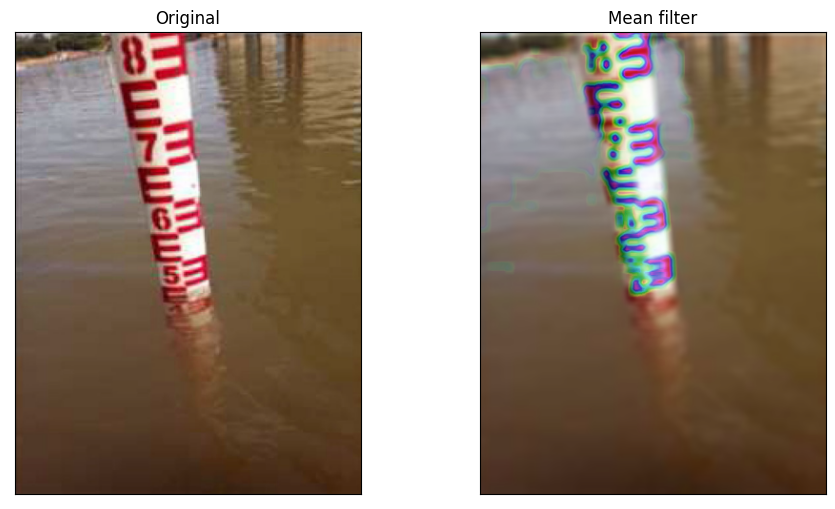

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
image = cv2.imread('testPic.png') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

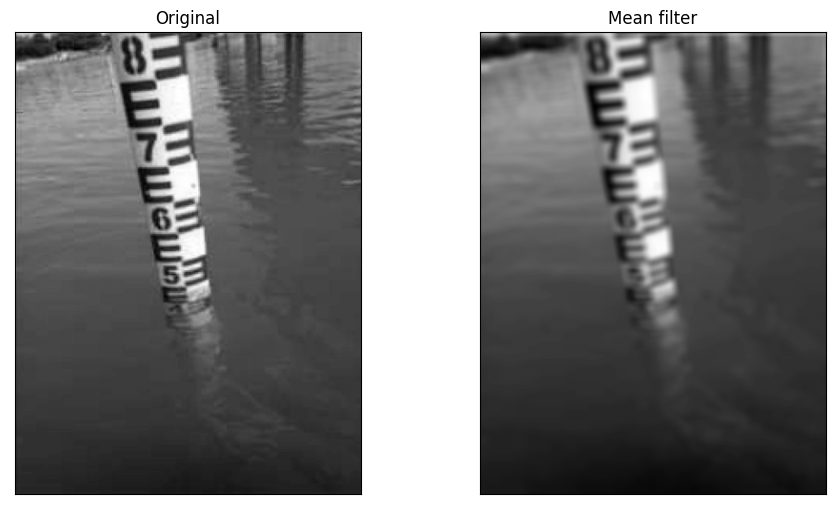

In [6]:
# The image will first be converted to grayscale
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
# first a conservative filter for grayscale images will be defined.
def conservative_smoothing_gray(data, filter_size):
    temp = []
    
    indexer = filter_size // 2
    
    new_image = data.copy()
    
    nrow, ncol = data.shape
    
    for i in range(nrow):
        
        for j in range(ncol):
            
            for k in range(i-indexer, i+indexer+1):
                
                for m in range(j-indexer, j+indexer+1):
                    
                    if (k > -1) and (k < nrow):
                        
                        if (m > -1) and (m < ncol):
                            
                            temp.append(data[k,m])
                            
            temp.remove(data[i,j])
            
            
            max_value = max(temp)
            
            min_value = min(temp)
            
            if data[i,j] > max_value:
                
                new_image[i,j] = max_value
            
            elif data[i,j] < min_value:
                
                new_image[i,j] = min_value
            
            temp =[]
    
    return new_image.copy()

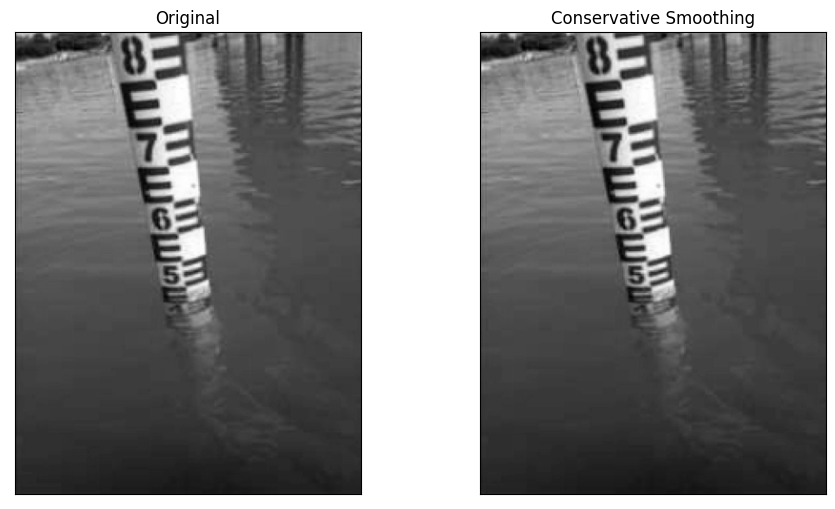

In [8]:
new_image = conservative_smoothing_gray(image2,5)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Conservative Smoothing')
plt.xticks([]), plt.yticks([])
plt.show()

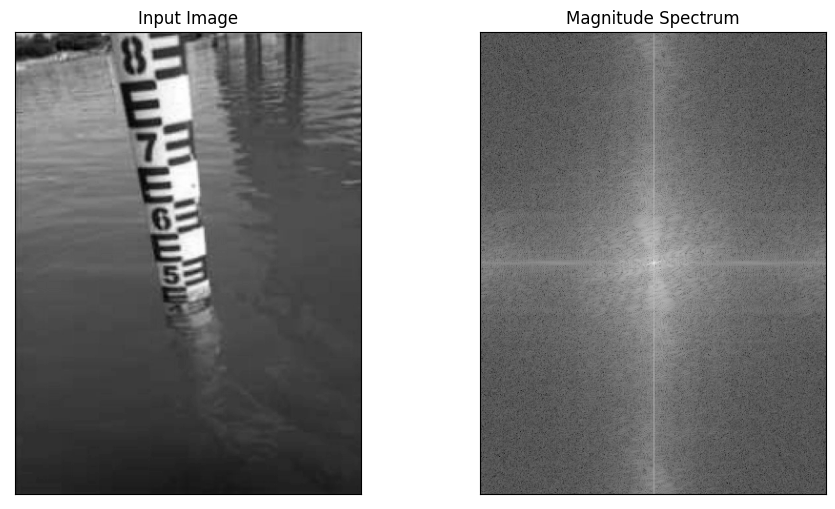

In [9]:
dft = cv2.dft(np.float32(image2),flags = cv2.DFT_COMPLEX_OUTPUT)
# shift the zero-frequncy component to the center of the spectrum
dft_shift = np.fft.fftshift(dft)
# save image of the image in the fourier domain.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(image2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

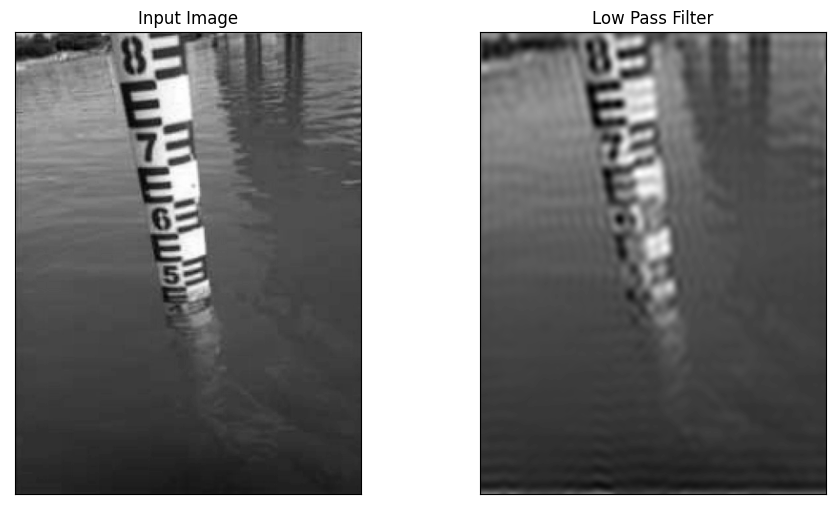

In [10]:
rows, cols = image2.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(image2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

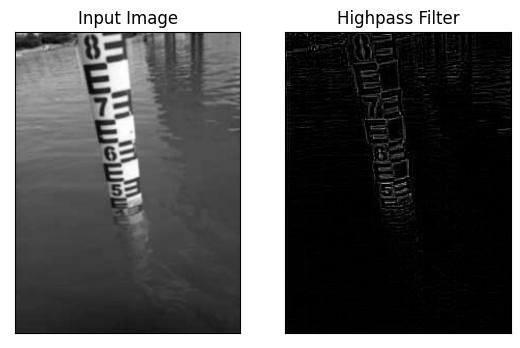

In [11]:
img_src = image2

#edge detection filter
kernel = np.array([[-1, -1.0, -1], 
                   [-1.0, 8.0, -1.0],
                   [-1, -1.0, -1]])

kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

#filter the source image
img_rst = cv2.filter2D(img_src,-1,kernel)

plt.subplot(121),plt.imshow(img_src, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_rst, cmap = 'gray')
plt.title('Highpass Filter'), plt.xticks([]), plt.yticks([])
plt.show()